# Space Shuttle STATLOG 

## Abstract: The shuttle dataset contains 9 attributes all of which are numerical. 

## http://archive.ics.uci.edu/ml/datasets/Statlog+%28Shuttle%29

In [67]:
import matplotlib.pyplot as plt
import math
from mlxtend.plotting import plot_decision_regions
import numpy as np
from numpy import percentile
from numpy.random import seed
import os
import pandas as pd
from sqlalchemy import create_engine
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
base_folder = r'C:\Users\user\OneDrive - Seedergy\MAEN\Code\Projects\Courses\Thinkful2020'
data_file = os.path.join(base_folder,'shuttle' + "." + 'trn')
#data=pd.read_csv("shuttle.trn",sep=" ",header=None)
df_data = pd.read_csv(data_file,sep=" ",header=None) 

## Explore the data

In [3]:
nRow, nCol = df_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 43500 rows and 10 columns


In [4]:
df_data.head(3)

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1


In [5]:
# Help functions to gather basic descriptions
def describe(df):
    return pd.concat([df.describe().T,
                      df.mad().rename('mean abs dev'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                      df.nunique().rename('unique')
                     ], axis=1).T

In [ ]:
# Non-numerical describe
df_stat = df_data.describe(include = ['O']) 
df_stat.loc['dtype'] = df_data.dtypes
df_stat.loc['size'] = len(df_data)
df_stat.loc['% null'] = df_data.isnull().mean().round(2)
df_stat

In [6]:
# Numerical describe
df_stat = df_data.describe(include = [np.number]) 
df_stat.loc['dtype'] = df_data.dtypes
df_stat.loc['size'] = len(df_data)
df_stat.loc['% null'] = df_data.isnull().mean().round(2)
df_stat

,0,1,2,3,4,5,6,7,8,9
count,43500,43500,43500,43500,43500,43500,43500,43500,43500,43500
mean,48.2497,-0.205126,85.3416,0.262736,34.5288,1.29828,37.0746,50.8999,13.9646,1.70053
std,12.2526,78.1428,8.9086,41.0041,21.7034,179.487,13.1356,21.4632,25.6484,1.35465
min,27,-4821,21,-3939,-188,-13839,-48,-353,-356,1
25%,38,0,79,0,26,-5,31,37,0,1
50%,45,0,83,0,42,0,39,44,2,1
75%,55,0,89,0,46,5,42,60,14,1
max,126,5075,149,3830,436,13148,105,270,266,7
dtype,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
size,43500,43500,43500,43500,43500,43500,43500,43500,43500,43500


In [7]:
# Remove status from the list of columnsnames
names = df_data.columns
names = [x for x in names if x != 9]

In [8]:
names

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [9]:
X = df_data.loc[:, names]
y = df_data.loc[:, 9]

In [10]:
X.head(2)

,0,1,2,3,4,5,6,7,8
0,50,21,77,0,28,0,27,48,22
1,55,0,92,0,0,26,36,92,56


In [11]:
y.head(2)

0    2
1    4
Name: 9, dtype: int64

## Split the data into training and test and fit the model

### Try some tuning and see impact on the accuracy

In [12]:
# Default setting with no penalty
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr_regularized = LogisticRegression(solver='lbfgs', penalty='none', random_state=2)
lr_regularized.fit(X_train, y_train)

lr_regularized.score(X_test, y_test)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.9173443129181678
Score on test data:  0.9149425287356322


## Score on test is quite high however we need to compare this to the baseline where we do not do any prediction.

In [13]:
# First we make our target class into binary type by assigning the value 1 to the most frequent class and 0 to the remaining
# get the frequency of the classes
y.value_counts()

1    34108
4     6748
5     2458
3      132
2       37
7       11
6        6
Name: 9, dtype: int64

In [14]:
# Use dummy values 1/0 for most frequent classes
y_2 = y.copy()
y_2[y_2 !=1] = 0
y_2[y_2 ==1] = 1

In [15]:
# Run the prediction using the most frequent class
# Default setting with no penalty
X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size=0.33, random_state=42)
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=2)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.9441413621547435
Score on test data:  0.9455938697318008


## We see the accuracy goes up if we just pick the most frequent value. This shows that it is not worthwhile to run any advance prediction if we are not going to tune the model to give us better accuracy than the baseline

## Another way of looking at this is to use dummy classifier without using any features.

In [16]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7838383838383839

## This score should make us to reflect on the usefulness of our classifier

### We should now consider following issues:
#### Are our features good predictors for our problem?
#### Do algorithm's parameters need tuning?
#### Do we have a large class imbalance?

## Confusion Matrix
### While it is important to have good accuracy, it does not tell the whole story. The confusion matrix gives us a deeper understanding of what is going on with our classification model performance by showing us how things are bucketed. It reveals to us which datapoints are bucketed correctly and which ones are not.

In [17]:
# Simple confusion matrix
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[11054   198]
 [  583  2520]]


In [18]:
# Prepare a nice looking matrix function
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

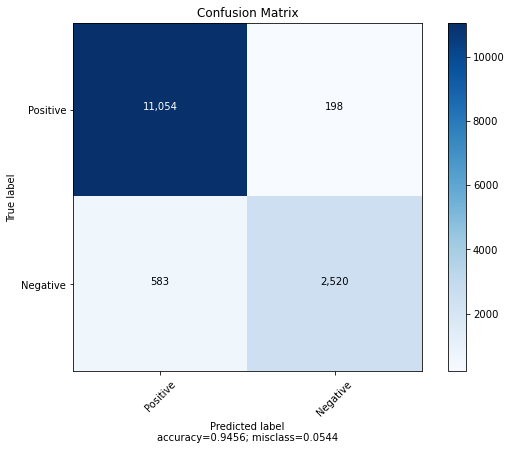

In [19]:
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)

In [20]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.95
Precision score: 0.95
Recall score: 0.98
F1 score: 0.97
Fbeta score favoring precision: 0.96
FBeta score favoring recall: 0.98


In [21]:
# We can get the same report using single call
report = classification_report(y_test, predictions, target_names=['Positive', 'Negative'])
print(report)

              precision    recall  f1-score   support

    Positive       0.93      0.81      0.87      3103
    Negative       0.95      0.98      0.97     11252

    accuracy                           0.95     14355
   macro avg       0.94      0.90      0.92     14355
weighted avg       0.94      0.95      0.94     14355



In [22]:
# We can get the same report using single call and this time using dummy classifier used to make prediction on dominant class
dummy_report = classification_report(y_test, dummy.predict(X_test), target_names=['Positive', 'Negative'])
print(dummy_report)

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      3103
    Negative       0.78      1.00      0.88     11252

    accuracy                           0.78     14355
   macro avg       0.39      0.50      0.44     14355
weighted avg       0.61      0.78      0.69     14355



### An alternative to having actual predictions is to have the probabilities of those instances

In [23]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[1:30])

[4.04365662e-09 9.78659935e-01 9.91559085e-01 9.99325980e-01
 7.16642991e-01 9.96590074e-01 9.96005757e-01 9.97328760e-01
 1.92016593e-01 9.95927275e-01 9.85939581e-01 3.26951346e-10
 9.93788299e-01 9.86411262e-01 9.75049128e-01 9.99521496e-01
 9.49435586e-01 9.90897701e-01 9.97375941e-01 9.99491233e-01
 6.75652600e-10 9.86919441e-01 1.25237942e-02 9.62164803e-01
 9.99894856e-01 2.53974069e-07 9.91945671e-01 8.90872928e-01
 9.70838138e-01]


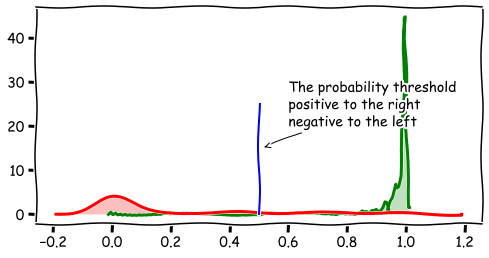

In [24]:
pos = [i for i, j in zip(probs, y_test) if j == 1]
neg = [i for i, j in zip(probs, y_test) if j == 0]

with plt.xkcd():
  fig = plt.figure(figsize=(8, 4))

  sns.distplot(pos, hist = False, kde = True, color='g',
                 kde_kws = {'shade': True, 'linewidth': 3})

  sns.distplot(neg, hist = False, kde = True, color='r',
                 kde_kws = {'shade': True, 'linewidth': 3})

  plt.plot([0.5, 0.5], [0, 25], '-b')
  plt.annotate(
        'The probability threshold\npositive to the right\nnegative to the left',
        xy=(0.51, 15), arrowprops=dict(arrowstyle='->'), xytext=(0.6, 20))

plt.show()

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])

[0.         0.         0.00032227 0.00032227 0.00064454 0.00064454
 0.00096681 0.00096681 0.00128908 0.00128908 0.00161134 0.00161134
 0.00193361 0.00193361 0.00225588 0.00225588 0.00257815 0.00257815
 0.00290042 0.00290042 0.00322269 0.00322269 0.00354496 0.00354496
 0.00386723 0.00386723 0.00418949 0.00418949 0.00483403]
[8.88730892e-05 7.55421258e-02 7.55421258e-02 7.63419836e-02
 7.63419836e-02 7.67863491e-02 7.67863491e-02 1.46373978e-01
 1.46373978e-01 3.29097049e-01 3.29097049e-01 3.30074653e-01
 3.30074653e-01 3.78599360e-01 3.78599360e-01 3.93707785e-01
 3.93707785e-01 4.96889442e-01 4.96889442e-01 4.97244934e-01
 4.97244934e-01 4.98755777e-01 4.98755777e-01 5.30394597e-01
 5.30394597e-01 5.46480626e-01 5.46480626e-01 5.69854248e-01
 5.69854248e-01]
[1.         0.99944777 0.9994468  0.99944294 0.9994429  0.99944073
 0.99944049 0.99866707 0.998662   0.99659005 0.99658634 0.99656074
 0.99655753 0.99577958 0.99577933 0.99543835 0.99543705 0.99095281
 0.99094709 0.9909347  0.99093

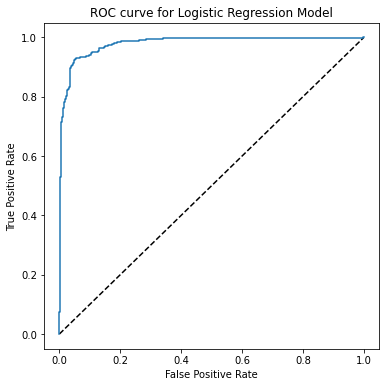

In [26]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

### The top left-hand corner of this graph is the ideal spot: it minimizes the false positive rate and maximizes the true positive rate. That dashed line represents a 50% chance classifier. That is, any classifier that works as well as a coin toss will have a curve close to that line. But that is as good as random. So curves just above that line are better than random.

## Precision-Recall Curve

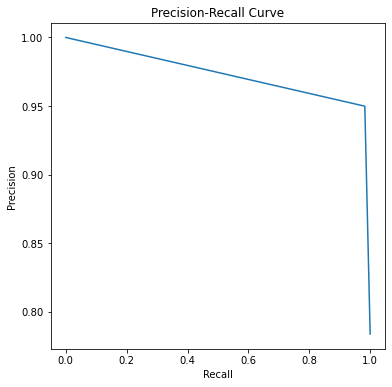

In [27]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Area under the ROC curve (AUC)

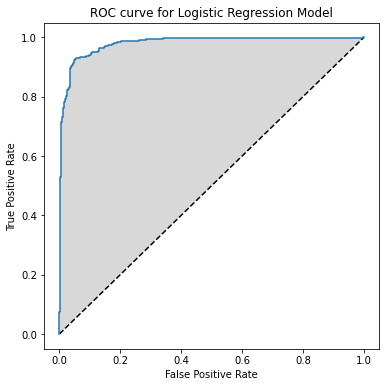

In [28]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [29]:
auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

Area under the ROC curve: 0.981


## Cross Validation

### First we run train test split twice, once where random sampling changes each time and once with same random state

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('First split score: {:.3f}'.format(lr.score(X_test, y_test)))

X_train, X_test, y_train, y_test = train_test_split(X, y_2, random_state=40)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('First split score: {:.3f}'.format(lr.score(X_test, y_test)))

First split score: 0.927
First split score: 0.948


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2, random_state=40)
clf = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.95524904 0.93256705 0.92       0.95218391 0.93318008]
Mean cross validatiion score: 0.939


### The prediction is still high when using 5 fold validation, giving us assurance that the model is performing well on unseen data multiple times.

In [32]:
# Increading iteration from 100 in default to 1000
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000, random_state=2)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

test_score = lr.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.7713716475095785
Score on test data:  0.9714942528735632


In [33]:
# Increading iteration from 100 in default to 1000 and choose l2 as the cost function
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000, random_state=2)
lr_regularized.fit(X_train, y_train)

lr_regularized.score(X_test, y_test)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.9710038314176245
Score on test data:  0.9714022988505747


In [63]:
# Create train and test sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Use of KNN

In [74]:
knn = KNeighborsClassifier(n_neighbors=7)
# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_7_score = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

knn.score(X_test, y_test)

test_score = knn.score(X_test, y_test)
train_score = knn.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.9979070166409333
Score on test data:  0.997979797979798


#### KNN scores are almost clost to 100% with k=7. And it seems they are not sensitive to different k. This indicate the features are quite representative in predicting the targets.

### Decision Tree

In [78]:
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)

rf.score(X_test, y_test)

test_score = rf.score(X_test, y_test)
train_score = rf.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  1.0
Score on test data:  0.999791013584117


#### Random forest scores are almost close to 100%. This can be an inidcator of overfitting that need further investigation.